# 키워드

- 1. 파일 처리 및 한글 인코딩
- 2. 판다스의 기본클래스
- 2-1-1 시리즈
- 2-1-2 데이터프레임

In [59]:
# 판다스 가져오기 및 별칭 설정
import pandas as pd
import numpy as np
from IPython.display import Image
# 판다스 버전확인
pd.__version__

'1.2.4'

## 1.3.5 파일 처리 및 한글 인코딩
 - csv,excel등의 파일안에 문자열이 한글일 경우 파이썬은 utf-8 인코딩 처리 후 데이터 프레임으로 전환해야 한다.

### 한글 인코딩
 - 파일을 읽고 그 파일이 어떤 형태로 한글 인코딩되는지 알아봐야 함.
 - chardet 모듈을 설치해서 사용
 - !pip install chardet
 - chardet모듈의 detect 메소드로 파일 정보를 읽은 후 encoding 속성을 확인해 조회할 수 있음.

In [7]:
# !pip install chardet
import chardet

def find_encoding(filename):
    read_file = open(filename, 'rb').read()        # 파일 읽기모드 rb는 read + 바이너리 파일( 바이너리 파일 읽을때 사용 )
    result    = chardet.detect(read_file)
    charenc   = result['encoding']
    return charenc

file_csv = 'C:/Users/ad/Desktop/test/DEAGU_FIN.csv'
my_encoding1 = find_encoding(file_csv)
df_1 = pd.read_csv(file_csv, encoding=my_encoding1)

print(my_encoding1)
df_1

UTF-8-SIG


,날짜,pm10,pm25,co,no2,o3,so2
0,2021-06-25,39,26,0.4,0.014,0.024,0.002
1,2021-06-24,28,17,0.3,0.009,0.043,0.002
2,2021-06-23,27,16,0.3,0.009,0.029,0.001
3,2021-06-22,32,17,0.3,0.009,0.037,0.002
4,2021-06-21,31,17,0.3,0.009,0.049,0.002
...,...,...,...,...,...,...,...
446,2020-04-05,33,12,0.4,0.009,0.038,0.003
447,2020-04-04,57,25,0.4,0.015,0.041,0.003
448,2020-04-03,43,24,0.5,0.019,0.038,0.003
449,2020-04-02,38,17,0.4,0.017,0.035,0.003


In [8]:
read_file1 = open(file_csv, 'rb').read()
chardet.detect(read_file1)

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

In [9]:
try:
    df_1 = pd.read_csv(file_csv, encoding="EUC-KR")
except Exception as e:
    print(e)

# 인코딩 형식이다르면 문자 관리 기준이 달라서 변환 할 수 없어서 오류 발생한다.


'euc_kr' codec can't decode byte 0x82 in position 4: illegal multibyte sequence


 - 엑셀을 가지고 csv파일을 만들어 별도의 변환을 하지않으면 엑셀은 기본적으로 cp949 인코딩 사용
 - 즉 저 파일을 읽고 처리하려면 반드시 cp949로 인코딩 해야한다.
 - p33 ~ 34 오류남 일단 방법은 상위에서 한 utf-8과 같음

In [10]:
df_3 = pd.read_csv(file_csv, engine='python')
df_3

# 판다스.read_csv 함수의 engine 매개변수에 python을 넣어서 파일을 읽으면 특정 인코딩을 처리하지 않아도 한글로 변환 된다.
# ** 한글로 변환할 때 간단히 매개변수 engine='python' 처리를 하면 쉽게 변환할 수 있다. ** 

,날짜,pm10,pm25,co,no2,o3,so2
0,2021-06-25,39,26,0.4,0.014,0.024,0.002
1,2021-06-24,28,17,0.3,0.009,0.043,0.002
2,2021-06-23,27,16,0.3,0.009,0.029,0.001
3,2021-06-22,32,17,0.3,0.009,0.037,0.002
4,2021-06-21,31,17,0.3,0.009,0.049,0.002
...,...,...,...,...,...,...,...
446,2020-04-05,33,12,0.4,0.009,0.038,0.003
447,2020-04-04,57,25,0.4,0.015,0.041,0.003
448,2020-04-03,43,24,0.5,0.019,0.038,0.003
449,2020-04-02,38,17,0.4,0.017,0.035,0.003


In [11]:
# 깃허브 파일 읽으려면 url 정보로 직접 .read_csv 함수에 넣어 처리할수 있다.
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/attention.csv'
#df_att = pd.read_csv(url)
df_att = pd.read_csv(url, error_bad_lines=False)
# error_bad_lines=False는 예외발생할 수 있기 때문에(에러) 설정함.
df_att.head(3)

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0


In [12]:
# df_att.columns
# Unnamed: 0 은 필요없기때문에 삭제한다 drop사용 매개면수 axis=1(컬럼기준)
# 원본 삭제하고 싶으면 inplace=True 매개변수 추가하면됨.
df_att.drop('Unnamed: 0',axis=1).head(3)

,subject,attention,solutions,score
0,1,divided,1,2.0
1,2,divided,1,3.0
2,3,divided,1,3.0


## 2.1 시리즈와 데이터 프레임 구조
### 2.1.1 시리즈
 - 보통 배열(array)은 인덱스(index)와 값을 갖는 구조로 만들어진다.
 - 판다스의 시리즈도 배열이지만 일반적 배열과는 차이점이 있다.
     - 시리즈는 보통의 배열과 달리 인덱스에 추가적인 디름인 레이블을 붙여 사용 할 수 있다.
     - 문자열이나 날자등을 레이블로 사용할 수 있으므로 특정이름으로 검색이 가능하다.
     - 일반적인 리스트보다 파이썬의 딕셔너리와 비슷한 구조이다.
         - 그러나 딕셔너리와 다른 점은 시리즈를 구성하는 모든 값이 단일 자료형으로 처리된다는 점이다.

#### 시리즈 구성 
 - 시리즈는 판다스 모듈에서 제공되는 1차원 배열
 - 시리즈는 데이터 프레임등의 다차원 배열의 원소로 구성되는 기본 클래스
 - 리스트, 딕셔너리로 시리즈 생성 가능

In [13]:
#dict_test = {'a':[1,2,3,4], 'b':[5,6,7,8]}
dict_test = {'a':[1,2,3,4]}

print(dict_test['a'])
dict_ser  = pd.Series(data=dict_test)
dict_ser

[1, 2, 3, 4]


a    [1, 2, 3, 4]
dtype: object

In [14]:
sr_v = [1,2,3,4]
sr   = pd.Series(data=sr_v, index=list('abcd'),name="sR!")
print("시리즈")
print(sr)
print("시리즈이름")
print(sr.name)
print("시리즈자료형 데이터들어간걸로 추론돼서 자동 설정됨")
print(sr.dtype)

시리즈
a    1
b    2
c    3
d    4
Name: sR!, dtype: int64
시리즈이름
sR!
시리즈자료형 데이터들어간걸로 추론돼서 자동 설정됨
int64


In [15]:
# 시리즈는 배열이므로 차원정보와 차원의 생긴모양이 중요하다

print("시리즈 모양")
print(sr.shape)
# shape은 모양을 보여주는데 튜플이고 () 4행이고 열은 없다(4,)

print("시리즈이름")
print(sr.ndim)
# ndim은 차원을 보여주는데 위의 shape에도 보였듯 열이없고 1차원이기때문에 1이 출력

print("원소의 개수")
print(sr.size)

# print("지속적인 확장 기준")
# print(sr.strides)
# .strides 속성안의 정보를 가지고 시리즈가 추가될 때마다 확장이 됩니다.
# p41 오류

print("배열의 레이블을 관리하는 속성")
print(sr.index)
# 배열의 인덱스(행) 레이블을 관리하는 속성


시리즈 모양
(4,)
시리즈이름
1
원소의 개수
4
배열의 레이블을 관리하는 속성
Index(['a', 'b', 'c', 'd'], dtype='object')


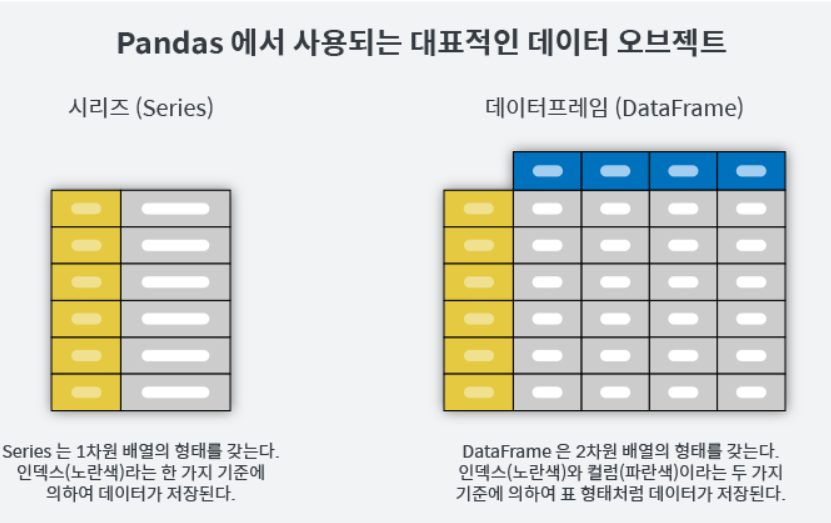

In [16]:
Image( 'C:/Users/ad/Desktop/일지/3주차 파이썬/res/res/20210713_143617.png' )

## 2.1.2 데이터 프레임
 - 배열중 2차원인 경우 열이나 행중심으로 원소를 관리한다.
 - 1차원인 시리즈를 가지고
 - 2차원배열인 데이터프레임을 관리한다.
 - 데이터 프레임 구성은 열기반으로 1차원 배열인 시리즈가 열단위로 저장됨
 - 시리즈와 데이터 프레임의 차이점은 일차적으로 차원이 확대되었고 각 차원에 대한 원소가 시리즈로 들어온다는 것
 - 데이터프레임과 가장 유사한 구조는 파이썬의 딕셔너리임
 - 딕셔너리의 첫번째 키는 열이 이름으로 들어가고
 - 실제값은 내부 딕셔너리 값이 들어가기때문

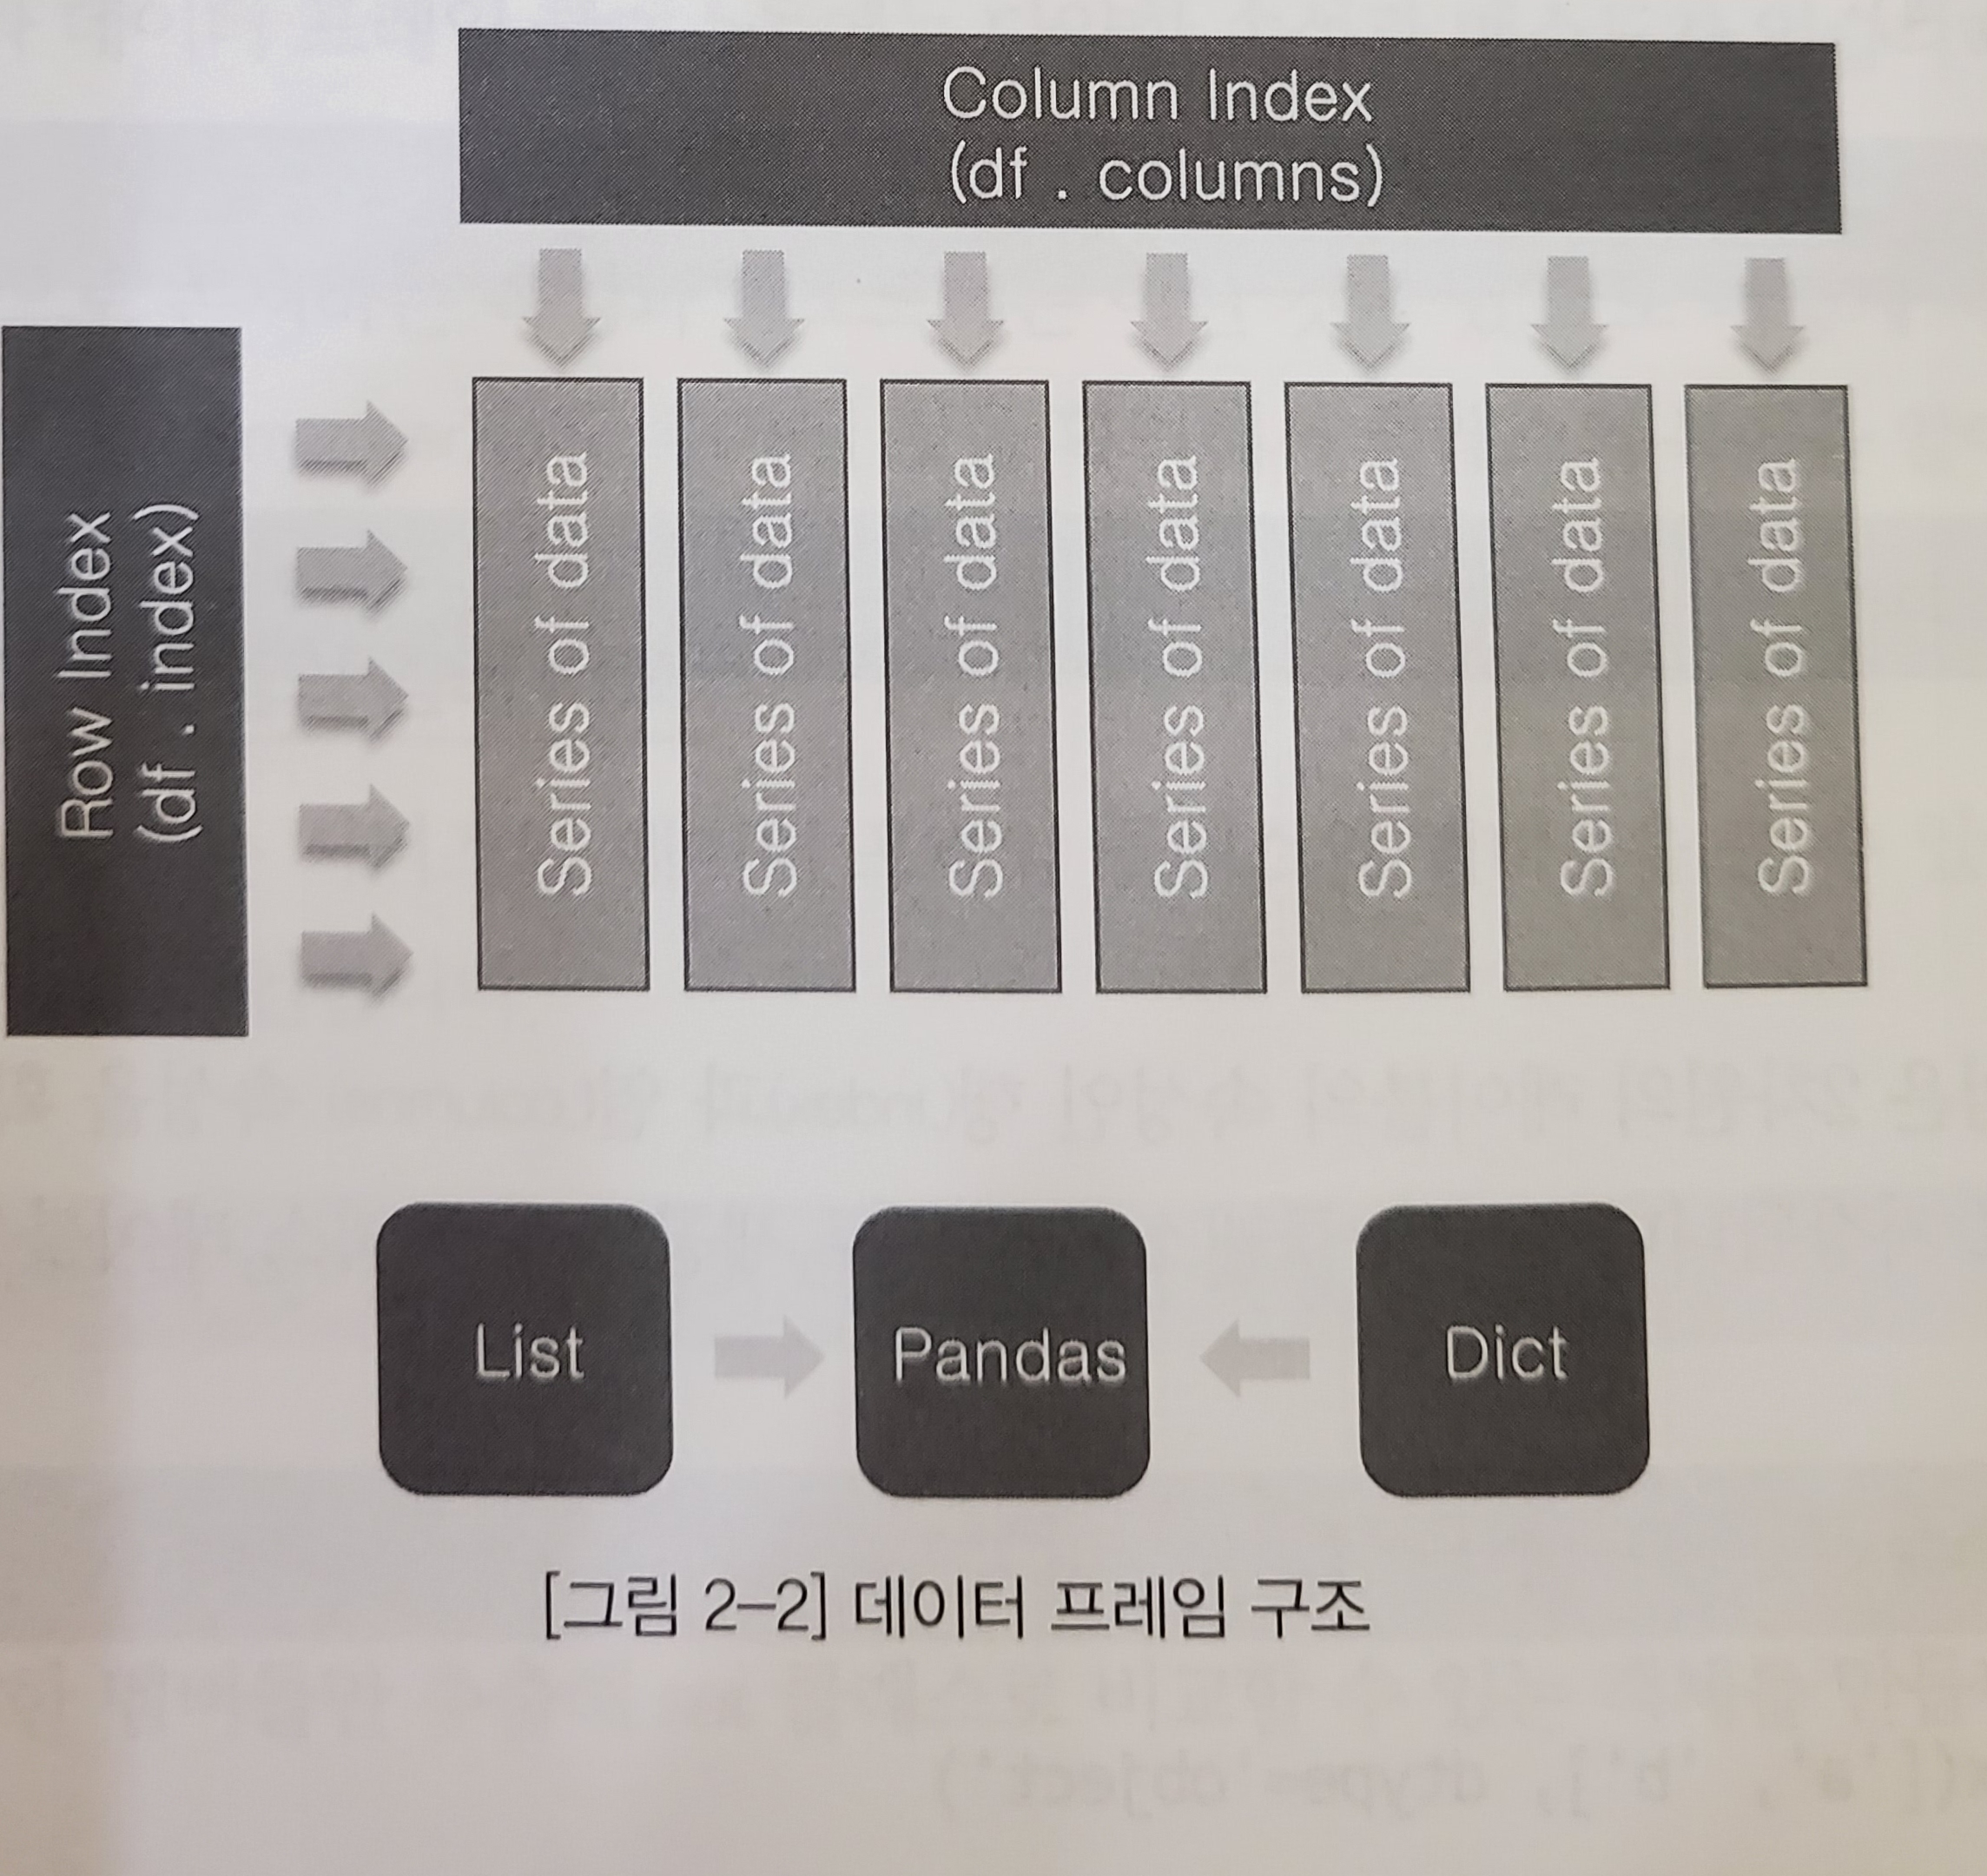

In [17]:
Image( 'C:/Users/ad/Desktop/일지/3주차 파이썬/res/res/KakaoTalk_20210713_144034229.jpg')

In [20]:
a = [
    [1,2,3,4],
    [5,6,7,8]
]
df = pd.DataFrame(data=a, columns=['c1','c2','c3','c4'], index=list("ab"))
df

,c1,c2,c3,c4
a,1,2,3,4
b,5,6,7,8


In [22]:
print("shape (행,열) 리턴")
print(df.shape)

print("ndim 차원 리턴")
print(df.ndim)

print("size 원소의 개수 리턴")
print(df.size)

print("인덱스(행) 정보")
print(df.index)

print("컬럼(열) 정보")
print(df.columns)

print("각 열에 저장된 정보 & 전체 메모리에 대한 정보(memory usage) 정보")
print(df.info())

shape (행,열) 리턴
(2, 4)
ndim 차원 리턴
2
size 원소의 개수 리턴
8
인덱스(행) 정보
Index(['a', 'b'], dtype='object')
컬럼(열) 정보
Index(['c1', 'c2', 'c3', 'c4'], dtype='object')
각 열에 저장된 정보 & 전체 메모리에 대한 정보(memory usage) 정보
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, a to b
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c1      2 non-null      int64
 1   c2      2 non-null      int64
 2   c3      2 non-null      int64
 3   c4      2 non-null      int64
dtypes: int64(4)
memory usage: 80.0+ bytes
None


In [26]:
import chardet

def find_encoding(filename):
    read_file = open(filename, 'rb').read()        # 파일 읽기모드 rb는 read + 바이너리 파일( 바이너리 파일 읽을때 사용 )
    result    = chardet.detect(read_file)
    charenc   = result['encoding']
    return charenc
# 읽을 파일 인코딩 알기위한 함수
# chardet.detect(파일경로) 하면 딕셔너리형태로 인코딩등의 결과를 반환함

csv_path = "C:/Users/ad/Desktop/일지/개인필기/PYTHON/데이터 분석/데이터 분석/판다스/경기도_양주시_대부업 현황_20210713.csv"
csvpath_encoding = find_encoding(csv_path)
df_f = pd.read_csv(csv_path, encoding= csvpath_encoding)

print(f'이 파일의 인코딩은{csvpath_encoding}입니다.')
df_f

이 파일의 인코딩은EUC-KR입니다.


,순번,시군구명,등록신청사업,영업구분,등록증번호,상호,대표자,법인여부,사업장 전화번호,소재지(도로명),우편번호,등록일자,유효기간만료일자,관리기관,관리기관 전화번호
0,1,경기도 양주시,대부업,영업중,2021-경기양주-0002-대부,민락대부,서숙희,개인,NaN,경기도 양주시 은현면 화합로941번길 310,11427,2021-03-29,2023-03-28,양주시 기업경제과,031-8082-6033
1,2,경기도 양주시,대부업,영업중,2021-경기양주-0001-대부,오성대부,나채식,개인,NaN,"경기도 양주시 부흥로 1932, 5층 123호 (광사동)",11492,2019-10-30,2022-10-30,양주시 기업경제과,031-8082-6033
2,3,경기도 양주시,대부업,영업중,2020-경기양주-0009,몬스터홀딩스대부,유혁연,개인,NaN,"경기도 양주시 평화로 1281, A동 1층 (산북동)",11497,2020-10-29,2023-10-29,양주시 기업경제과,031-8082-6033
3,4,경기도 양주시,대부업,영업중,2020-경기양주-0008,대신대부,이범훈,개인,NaN,경기도 양주시 광적면 광적로155번길 131,11420,2020-09-25,2023-09-25,양주시 기업경제과,031-8082-6033
4,5,경기도 양주시,대부중개업,영업중,2020-경기양주-0007,뉴하이론 캐피탈 대부중개,주정만,개인,1688-7568,"경기도 양주시 평화로1479번길 12, 원재빌딩 3층 301,302호 (덕계동)",11440,2020-09-09,2023-09-09,양주시 기업경제과,031-8082-6033
5,6,경기도 양주시,대부업,영업중,2020-경기양주-0006,대교대부,이종민,개인,NaN,"경기도 양주시 광적면 광적로 85-18, 상가동 204-2호 (희망아파트)",11420,2020-06-29,2023-06-29,양주시 기업경제과,031-8082-6033
6,7,경기도 양주시,대부업,영업중,2020-경기양주-0005,알찬대부,이승희,개인,031-867-2335,"경기도 양주시 평화로 1448, 1층 (덕계동)",11444,2020-04-01,2023-04-01,양주시 기업경제과,031-8082-6033
7,8,경기도 양주시,대부업,영업중,2020-경기양주-0003,삼덕대부 주식회사,안경민,법인,031-871-6618,경기도 양주시 백석읍 중앙로 223,11516,2020-02-13,2023-02-12,양주시 기업경제과,031-8082-6033
8,9,경기도 양주시,대부중개업,영업중,2019-경기양주-0005,한국대부중개,백성민,개인,NaN,"경기도 양주시 백석읍 양주산성로 513, 2층",11512,2019-06-19,2022-06-19,양주시 기업경제과,031-8082-6033
9,10,경기도 양주시,대부업,영업중,2019-경기양주-0004,한국대부캐피탈,백성민,개인,031-829-5837,"경기도 양주시 백석읍 양주산성로 513, 2층",11512,2019-06-19,2022-06-19,양주시 기업경제과,031-8082-6033


In [39]:
print(f'데이터프레임 (행, 열){df_f.shape}')
# 14행 15열 임을 알 수있음

print(df_f['시군구명'].head(1))
# 데이터프레임에서 하나의 열을 조회하려면 인덱싱연산자[]를 이용해 열의 이름을 문자열로 넣어 조회하면됨

print("===df_f 사업장 전화번호컬럼 결측치 합===")
print(df_f['사업장 전화번호'].isnull().sum())

df_f.isnull()
# 결측치 보기위한 isnull(결측이면(NaN) True 아니면 False)

데이터프레임 (행, 열)(14, 15)
0    경기도 양주시
Name: 시군구명, dtype: object
===df_f 사업장 전화번호컬럼 결측치 합===
6


,순번,시군구명,등록신청사업,영업구분,등록증번호,상호,대표자,법인여부,사업장 전화번호,소재지(도로명),우편번호,등록일자,유효기간만료일자,관리기관,관리기관 전화번호
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
test_list = [
    [1,2,3,4],
    [5,6,7,8]
]

test_list2 = [
    [1,5,3,6],
    [5,9,7,10]
]
df = pd.DataFrame(data=test_list, columns=list('abcd'))
df2 = pd.DataFrame(data=test_list2, columns=list('abcd'))
print(df)
print(df2)

print (df.iloc[0] == df2.iloc[0])
# 비교 연산자를 쓰면 같으면 True 다르면 False 처리
print(df.values)

print(df.sample(1))
# 데이터 프레임에서 무작위로 .sample(임의값) 임의값 만큼의 행을 추출해서 데이터프레임을 만들어줌

# pd.option.display.max_index?

   a  b  c  d
0  1  2  3  4
1  5  6  7  8
   a  b  c   d
0  1  5  3   6
1  5  9  7  10
a     True
b    False
c     True
d    False
Name: 0, dtype: bool
[[1 2 3 4]
 [5 6 7 8]]
   a  b  c  d
0  1  2  3  4


## 2.2 시리즈 생성방법
### 2.2.1 시리즈 생성자
 - 시리즈 클래스의 생성자는 data,index,dtype,copy 4개의 매개변수를 받음
 - 데이터는 리스트나 딕셔너리 등 보통 1차원을 받음
 - index, dtype, copy 등 인자는 기본값이 있어서 안넣어도 됨.
 - 판다스/넘파이는 다양한 자료형이 있지만 기본 64비트로 처리

In [54]:
obj = pd.Series(data={'a':1,'b':2,'c':3})
print(obj)
obj.values

a    1
b    2
c    3
dtype: int64


array([1, 2, 3], dtype=int64)

#### 딕셔너리로 시리즈 생성
 - 딕셔너리로 시리즈를 생성하면 키는 행의 레이블로 처리되고 값은 시리즈의 데이터로 처리되어 명시적으로 레이블을 지정한 것과 같은 결과가 나옴

In [58]:
obj2 = pd.Series(data=[1,2,3],index=list('abc'))
obj2

a    1
b    2
c    3
dtype: int64

### 넘파이와 배열의 차이점

In [61]:
s = pd.Series(np.random.randn(5))
s

# 넘파이의 random 모듈은 무작위 값을 만드는데 randn은 임의의 정규분포에서 (5개의) 원소를 추출한다.

0   -1.255245
1    0.118086
2    1.453274
3    1.238904
4   -1.284283
dtype: float64

In [62]:
obj = pd.Series(data=[1,2,3,4], name="obj")
print(f"시리즈의 (행,열) == {obj.shape}")
print(f"시리즈의 차원 == {obj.ndim}")

시리즈의 행,열(4,)
시리즈의 차원1


## 2.3 데이터프레임 생성
 - 데이터 프레임은 2차원 배열임
 - 행과열의 정보를 별도로 보관하고
 - 내부의 관리는 1차원인 시리즈의 기준을 따른다.

### 2.3.1 데이터프레임의 생성자

#### 시리즈를 딕셔너리에 넣어 데이터 프레임 생성

In [64]:
# 시리즈로 데이터 프레임 생성하기
n_1 = pd.Series(data= [1,2,3,4], name='n_1')
c_1 = pd.Series(data= ['a','b','c','d'], name='c_1')
df  = pd.DataFrame({'n1':n_1, 'c1':c_1})
df

,n1,c1
0,1,a
1,2,b
2,3,c
3,4,d


In [70]:
print(df['n1'])
print(n_1)
n_1 == df['n1']

0    1
1    2
2    3
3    4
Name: n1, dtype: int64
0    1
1    2
2    3
3    4
Name: n_1, dtype: int64


0    True
1    True
2    True
3    True
dtype: bool

In [74]:
# 리스트로 데이터프레임 만들기

s1 = [1,2,3,4]
s2 = ['a','b','c','d']
df_aa = pd.DataFrame([s1,s2])
df_aa


,0,1,2,3
0,1,2,3,4
1,a,b,c,d


In [79]:
# {딕셔너리{딕셔너리}}로 데이터프레임 만들기

data_dict = {
    'AAA' : {'a' : 4, 'b': 5, 'c': 6, 'd':7},
    'BBB' : {'a' : 10, 'b': 20, 'c': 30, 'd':40},
    'CCC' : {'a' : 100, 'b': 50, 'c': -30, 'd':-540},
}

dictinDict_df = pd.DataFrame(data_dict)
dictinDict_df

,AAA,BBB,CCC
a,4,10,100
b,5,20,50
c,6,30,-30
d,7,40,-540


In [80]:
dictinDict_df2 = pd.DataFrame(data_dict, columns=['AAA',"CCC"])
dictinDict_df2
# 컬럼스로 제한두기
# 실제 데이터는 3개의 열이 있지만 columns 매개변수에 2개만 지정했기때문에 매칭되는 2개의 열만 만들어진다.``

,AAA,CCC
a,4,100
b,5,50
c,6,-30
d,7,-540


### 2.3.2 데이터 프레임 구성 기본 속성 알아보기
 - 데이터 프레임은 2차원으로 구성되어 있고, 행과 열의 레이블이 있으며, 데이터를 별도로 관리한다.

In [81]:
name = ['Bob', 'Jessica', 'Mary', 'John', 'Mel']
births = [968, 155, 77, 578, 973]
babyDataSet = list(zip(name,births))
print(babyDataSet)
# 리스트에 두개의 튜플이 있는 데이터를 만들기 위해 두개의 리스트를 만들고 zip함수로 리스트를 묶는다.

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]


In [86]:
# 위에서 만들어진 2개의 원소를 가질 튜플의 리스트를 data에 넣고
# 두개의 리스트를 보관하는 변수명과 같은 문자열을 colums 속성에 리스트로 넣었다.
df = pd.DataFrame(data=babyDataSet, columns=['names', 'births'])
df

,names,births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [89]:
print(df.values) # 데이터에 대한 정보(data =)
print()
print(df.axes) # 인덱스의 정보(행,열)
print()
print(df.index) #열 인덱스에대한 정보
print()
print(df.columns) #행인덱스(컬럼)에 대한 정보

[['Bob' 968]
 ['Jessica' 155]
 ['Mary' 77]
 ['John' 578]
 ['Mel' 973]]

[RangeIndex(start=0, stop=5, step=1), Index(['names', 'births'], dtype='object')]

RangeIndex(start=0, stop=5, step=1)

Index(['names', 'births'], dtype='object')


# 주피터 노트북과 파이썬을 이용한 데이터분석
## 손에 잡히는 판다스
### 문용준 지음 _ 2018.11.30 
#### 비제이퍼블릭 발행
##### 페이지31 1.3.5 부터 ~ 60 2.4 인덱스검색 전까지